In [ ]:
import np as np

import Ramsey_ExperimentV3
from tqdm import tqdm
import random

import estimator
import numpy as np

In [ ]:

T = 1 * np.pi
uni_delay = np.linspace(0, T, 20)
shots = 1000
errors_fisher = []
errors_local = []
uniform_local = []
uniform_local_G = []
n = 1
delay = [1]
fisher_delay = [0.4439410861020235, 1.784695781691183]

decay_fit = []

repetitions = 100
# W =]
Decay = np.arange(0.001, 4, 0.25)
# np.delete(W, 0)
W = [1]
J = {}
J_list = [random.gauss(1, 0) for _ in range(n - 1)]

for rep in range(repetitions):
    rep_error_fisher = []
    rep_error_local = []
    rep_error_uniform = []
    rep_error_uniform_G = []

    rep_decay_fit = []
    for decay in tqdm(Decay, desc=f"Repetition {rep}"):
        ### Create experiments
        batch_x_det, batch_y_det, batch_x_cross, batch_y_cross = Ramsey_ExperimentV3.ramsey_local(n, shots, delay,
                                                                                                  [decay], W, J)
        batch_det, batch_cross = Ramsey_ExperimentV3.ramsey_local_X(n, shots, fisher_delay, [decay], W, J)
        batch_x_det_uni, batch_y_det_uni, batch_x_cross_uni, batch_y_cross_uni = Ramsey_ExperimentV3.ramsey_local(n,
                                                                                                                  shots,
                                                                                                                  uni_delay,
                                                                                                                  [
                                                                                                                      decay],
                                                                                                                  W, J)
        # batch_x_det_uni_G,batch_y_det_uni_G, batch_x_cross_uni_G, batch_y_cross_uni_G = Ramsey_ExperimentV3.ramsey_local_gausian(n, shots,0.7*delay[0],delay[0], uni_delay, [decay], W, J)

        ### Fit the data
        Decay_local, W_local, J_local = estimator.one_by_one_fit(batch_x_det, batch_y_det, batch_x_cross, batch_y_cross)
        Decay_fisher, W_fisher, J_fisher = estimator.one_by_one_X(batch_det, batch_cross)
        Decay_uni, W_uni, J_uni = estimator.one_by_one_fit(batch_x_det_uni, batch_y_det_uni, batch_x_cross_uni,
                                                           batch_y_cross_uni)
        # Decay_uni, W_uni, J_uni = estimator.one_by_one_X(batch_uni_det, batch_uni_cross)
        rep_decay_fit.append(Decay_fisher)

        ### Calculate the errors
        fisher_errors = estimator.percent_error(np.concatenate([W, [decay], J_list]),
                                                np.concatenate([W_fisher, Decay_fisher, J_fisher]))
        local_errors = estimator.percent_error(np.concatenate([W, [decay], J_list]),
                                               np.concatenate([W_local, Decay_local, J_local]))
        uniform_errors = estimator.percent_error(np.concatenate([W, [decay], J_list]),
                                                 np.concatenate([W_uni, Decay_uni, J_uni]))

        rep_error_fisher.append(fisher_errors)
        rep_error_local.append(local_errors)
        rep_error_uniform.append(uniform_errors)
        # rep_error_uniform_G.append(estimator.percent_error(np.concatenate([W,[decay], J_list]),

    decay_fit.append(rep_decay_fit)

    errors_fisher.append(rep_error_fisher)
    errors_local.append(rep_error_local)
    uniform_local.append(rep_error_uniform)
    # uniform_local_G.append(rep_error_uniform_G)


In [120]:
fitted_data = []
T = 1 * np.pi
uni_delay = np.linspace(0, T, 20)
shots = 1000
errors_fisher = []
errors_local = []
uniform_local = []
uniform_local_G = []
n = 1
delay = [1]
fisher_delay = [0.4439410861020235, 1.784695781691183]

decay_fit = []

repetitions = 1000
# W =]
Decay = np.arange(0.001, 4, 0.25)
# np.delete(W, 0)
W = [1]
J = {}
J_list = [random.gauss(1, 0) for _ in range(n - 1)]
for rep in range(repetitions):
    rep_decay_fit = []
    for decay in tqdm(Decay, desc=f"Repetition {rep}"):
        # Create experiments
        batch_x_det, batch_y_det, batch_x_cross, batch_y_cross = Ramsey_ExperimentV3.ramsey_local(
            n, shots, delay, [decay], W, J
        )
        batch_det, batch_cross = Ramsey_ExperimentV3.ramsey_local_X(n, shots, fisher_delay, [decay], W, J)
        batch_x_det_uni, batch_y_det_uni, batch_x_cross_uni, batch_y_cross_uni = Ramsey_ExperimentV3.ramsey_local(
            n, shots, uni_delay, [decay], W, J
        )

        # Append batches and decay to decay fit list
        rep_decay_fit.append((
            decay,
            (batch_x_det, batch_y_det, batch_x_cross, batch_y_cross),
            (batch_det, batch_cross),
            (batch_x_det_uni, batch_y_det_uni, batch_x_cross_uni, batch_y_cross_uni),
        ))

    decay_fit.append(rep_decay_fit)

Repetition 999: 100%|██████████| 16/16 [00:00<00:00, 28.10it/s]


In [127]:
from importlib import reload
reload(estimator)

<module 'estimator' from 'C:\\Users\\david\\PycharmProjects\\Crosstalk\\estimator.py'>

In [128]:

for rep, rep_batches in enumerate(decay_fit):
    rep_fits = []
    print(f"Repetition {rep} / {repetitions}")
    for decay, (batch_x_det, batch_y_det, batch_x_cross, batch_y_cross), (batch_det, batch_cross), (batch_x_det_uni, batch_y_det_uni, batch_x_cross_uni, batch_y_cross_uni) in rep_batches:
        Decay_local, W_local, J_local = estimator.one_by_one_fit(batch_x_det, batch_y_det, batch_x_cross, batch_y_cross)
        Decay_fisher, W_fisher, J_fisher = estimator.one_by_one_X(batch_det, batch_cross)
        Decay_uni, W_uni, J_uni = estimator.one_by_one_fit(batch_x_det_uni, batch_y_det_uni, batch_x_cross_uni, batch_y_cross_uni)

        rep_fits.append((
            decay,
            (Decay_local, W_local, J_local),
            (Decay_fisher, W_fisher, J_fisher),
            (Decay_uni, W_uni, J_uni),
        ))

    fitted_data.append(rep_fits)

Repetition 0 / 1000
Repetition 1 / 1000
Repetition 2 / 1000
Repetition 3 / 1000
Repetition 4 / 1000
Repetition 5 / 1000
Repetition 6 / 1000
Repetition 7 / 1000
Repetition 8 / 1000
Repetition 9 / 1000
Repetition 10 / 1000
Repetition 11 / 1000
Repetition 12 / 1000
Repetition 13 / 1000
Repetition 14 / 1000
Repetition 15 / 1000
Repetition 16 / 1000
Repetition 17 / 1000
Repetition 18 / 1000
Repetition 19 / 1000
Repetition 20 / 1000
Repetition 21 / 1000
Repetition 22 / 1000
Repetition 23 / 1000
Repetition 24 / 1000
Repetition 25 / 1000
Repetition 26 / 1000
Repetition 27 / 1000
Repetition 28 / 1000
Repetition 29 / 1000
Repetition 30 / 1000
Repetition 31 / 1000
Repetition 32 / 1000
Repetition 33 / 1000
Repetition 34 / 1000
Repetition 35 / 1000
Repetition 36 / 1000
Repetition 37 / 1000
Repetition 38 / 1000
Repetition 39 / 1000
Repetition 40 / 1000
Repetition 41 / 1000
Repetition 42 / 1000
Repetition 43 / 1000
Repetition 44 / 1000
Repetition 45 / 1000
Repetition 46 / 1000
Repetition 47 / 1000
Re

In [123]:
for rep, rep_fits in enumerate(fitted_data):
    rep_error_fisher = []
    rep_error_local = []
    rep_error_uniform = []

    for decay, (Decay_local, W_local, J_local), (Decay_fisher, W_fisher, J_fisher), (Decay_uni, W_uni, J_uni) in rep_fits:
        fisher_errors = estimator.percent_error(
            np.concatenate([W, [decay], J_list]),
            np.concatenate([W_fisher, Decay_fisher, J_fisher])
        )
        local_errors = estimator.percent_error(
            np.concatenate([W, [decay], J_list]),
            np.concatenate([W_local, Decay_local, J_local])
        )

        for error in local_errors:
            if error > 2:
                print(f"Decay: {decay}, fitted_decay: {Decay_local} , error: {error}")
        uniform_errors = estimator.percent_error(
            np.concatenate([W, [decay], J_list]),
            np.concatenate([W_uni, Decay_uni, J_uni])
        )

        rep_error_fisher.append(fisher_errors)
        rep_error_local.append(local_errors)
        rep_error_uniform.append(uniform_errors)

    errors_fisher.append(rep_error_fisher)
    errors_local.append(rep_error_local)
    uniform_local.append(rep_error_uniform)



Decay: 0.001, fitted_decay: [0.03555469822818742] , error: 34.554698228179745
Decay: 3.501, fitted_decay: [2.9305691427201137] , error: 2.3683915016437345
Decay: 0.001, fitted_decay: [0.027240777587557545] , error: 26.240777587551715
Decay: 0.001, fitted_decay: [0.0399546916248731] , error: 38.954691624864445
Decay: 3.751, fitted_decay: [2.859955903986168] , error: 2.352686281480961
Decay: 0.001, fitted_decay: [0.015592623222702369] , error: 14.592623222699128
Decay: 3.251, fitted_decay: [11.985758294784098] , error: 2.6867912318622262
Decay: 3.001, fitted_decay: [2.9933376790671966] , error: 2.640938847895679
Decay: 3.751, fitted_decay: [11.999122518131951] , error: 2.198912961378819
Decay: 0.001, fitted_decay: [0.0115402065386096] , error: 10.540206538607261
Decay: 0.001, fitted_decay: [0.013714380508631264] , error: 12.71438050862844
Decay: 3.501, fitted_decay: [2.804599916157917] , error: 2.2741441846238284
Decay: 0.001, fitted_decay: [0.023990503915600408] , error: 22.990503915595

In [129]:
k = 33

errors_fisher_reshaped = np.array(errors_fisher).transpose()
errors_local_reshaped = np.array(errors_local).transpose()
errors_uniform_reshaped = np.array(uniform_local).transpose()

# errors_local_reshaped = list(map(list, zip(*errors_local)))
# errors_uniform_reshaped = list(map(list, zip(*uniform_local)))
# errors_fisher_reshaped_G = list(map(list, zip(*uniform_local_G)))

errors_fisher_reshaped_a = errors_fisher_reshaped[1]
errors_local_reshaped_a = errors_local_reshaped[1]
errors_uniform_reshaped_a = errors_uniform_reshaped[1]

errors_fisher_reshaped_w = errors_fisher_reshaped[0]
errors_local_reshaped_w = errors_local_reshaped[0]
errors_uniform_reshaped_w = errors_uniform_reshaped[0]

errors_fisher_median_a, errors_fisher_std_a = estimator.mean_of_medians(errors_fisher_reshaped_a, k)
errors_local_median_a, errors_local_std_a = estimator.mean_of_medians(errors_local_reshaped_a, k)
errors_uniform_median_a, errors_uniform_std_a = estimator.mean_of_medians(errors_uniform_reshaped_a, k)

errors_fisher_median_w, errors_fisher_std_w = estimator.mean_of_medians(errors_fisher_reshaped_w, k)
errors_local_median_w, errors_local_std_w = estimator.mean_of_medians(errors_local_reshaped_w, k)
errors_uniform_median_w, errors_uniform_std_w = estimator.mean_of_medians(errors_uniform_reshaped_w, k)

# errors_uniform_median_G, errors_uniform_std_G = estimator.mean_of_medians(errors_fisher_reshaped_G, k)


<>:24: SyntaxWarning: invalid escape sequence '\g'
<>:25: SyntaxWarning: invalid escape sequence '\g'
<>:24: SyntaxWarning: invalid escape sequence '\g'
<>:25: SyntaxWarning: invalid escape sequence '\g'
C:\Users\david\AppData\Local\Temp\ipykernel_24720\4260931697.py:24: SyntaxWarning: invalid escape sequence '\g'
  plt.xlabel('$\gamma$')
C:\Users\david\AppData\Local\Temp\ipykernel_24720\4260931697.py:25: SyntaxWarning: invalid escape sequence '\g'
  plt.ylabel('Median / $\gamma$')
C:\Users\david\AppData\Local\Temp\ipykernel_24720\4260931697.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


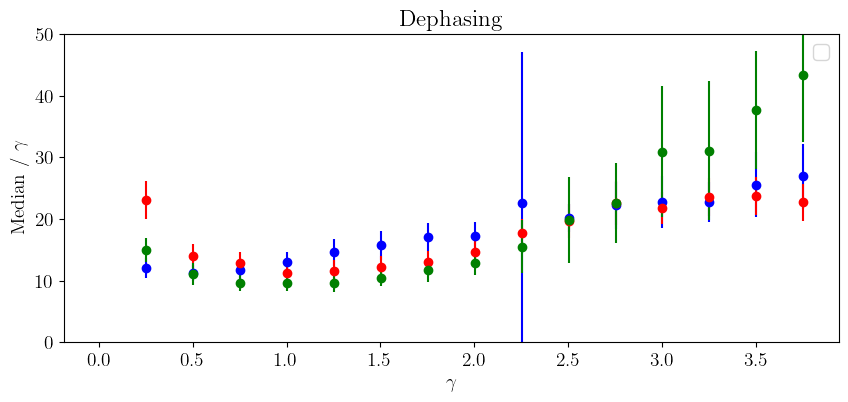

In [130]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))  # Adjust the figure size to make the plot longer
plt.rcParams['text.usetex'] = True
font = {'family': 'normal',
        'weight': 'bold',
        'size': 14}

plt.rc('font', **font)

plt.errorbar(Decay, 100 * np.array(errors_uniform_median_a), yerr=100 * np.array(errors_uniform_std_a),
             fmt='o', color='blue')
plt.errorbar(Decay, 100 * np.array(errors_fisher_median_a), yerr=100 * np.array(errors_fisher_std_a),
             fmt='o', color='red')
plt.errorbar(Decay, 100 * np.array(errors_local_median_a), yerr=100 * np.array(errors_local_std_a), fmt='o',
             color='green')
# plt.errorbar(Decay, 100 * np.array(errors_uniform_median_G/Decay ), yerr=100 * np.array(errors_uniform_std_G/Decay ), fmt='o',
#              color='magenta')
# Scatter points for 75th percentiles


plt.title("Dephasing")
# plt.title(f'Shots={Decay} ')
plt.xlabel('$\gamma$')
plt.ylabel('Median / $\gamma$')
plt.grid()
# plt.yscale('log')
# plt.xscale('log')
# plt.xlim([0, 2])
plt.ylim([0, 50])
plt.grid()
plt.legend()

<>:23: SyntaxWarning: invalid escape sequence '\g'
<>:24: SyntaxWarning: invalid escape sequence '\g'
<>:23: SyntaxWarning: invalid escape sequence '\g'
<>:24: SyntaxWarning: invalid escape sequence '\g'
C:\Users\david\AppData\Local\Temp\ipykernel_24720\2828281580.py:23: SyntaxWarning: invalid escape sequence '\g'
  plt.xlabel('$\gamma$')
C:\Users\david\AppData\Local\Temp\ipykernel_24720\2828281580.py:24: SyntaxWarning: invalid escape sequence '\g'
  plt.ylabel('Median / $\gamma$')
C:\Users\david\AppData\Local\Temp\ipykernel_24720\2828281580.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


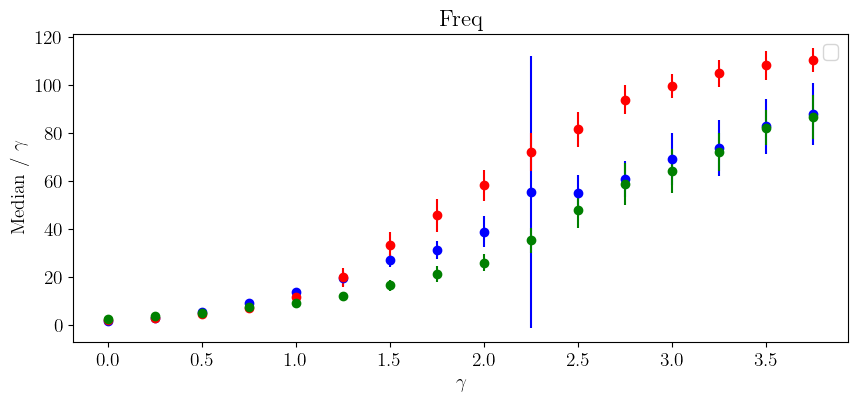

In [131]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))  # Adjust the figure size to make the plot longer
plt.rcParams['text.usetex'] = True
font = {'family': 'normal',
        'weight': 'bold',
        'size': 14}

plt.rc('font', **font)

plt.errorbar(Decay, 100 * np.array(errors_uniform_median_w), yerr=100 * np.array(errors_uniform_std_w),
             fmt='o', color='blue')
plt.errorbar(Decay, 100 * np.array(errors_fisher_median_w), yerr=100 * np.array(errors_fisher_std_w),
             fmt='o', color='red')
plt.errorbar(Decay, 100 * np.array(errors_local_median_w), yerr=100 * np.array(errors_local_std_w), fmt='o',
             color='green')
# plt.errorbar(Decay, 100 * np.array(errors_uniform_median_G/Decay ), yerr=100 * np.array(errors_uniform_std_G/Decay ), fmt='o',
#              color='magenta')
# Scatter points for 75th percentiles
plt.title("Freq")

# plt.title(f'Shots={Decay} ')
plt.xlabel('$\gamma$')
plt.ylabel('Median / $\gamma$')
plt.grid()
# plt.yscale('log')
# plt.xscale('log')
# plt.xlim([0, 2])
# plt.ylim([0,50])
plt.grid()

plt.legend()

In [ ]:
# index = 9
X = np.array(100 * np.array(errors_local_reshaped_a))[12][:100]
# print("Decay: ",Decay[index])
# print(X)
#plot histogram with 10 bins
plt.hist(X, bins=20, color='blue', edgecolor='black', alpha=0.7)
q75, q25 = np.percentile(X, [75, 25])
iqr = q75 - q25
print("mean: ", np.mean(X))
print("IQR: ", iqr)
print("std: ", np.std(X))

In [133]:
import pandas as pd

results_df = pd.DataFrame({
    "shots": shots,
    "Decay": Decay,
    "errors_fisher_median_w": errors_fisher_median_w,
    "errors_fisher_std_w": errors_fisher_std_w,
    "errors_local_median_w": errors_local_median_w,
    "errors_local_std_w": errors_local_std_w,
    "errors_uniform_median_w": errors_uniform_median_w,
    "errors_uniform_std_w": errors_uniform_std_w,
})

# Saving to Excel
results_df.to_excel(
    r'C:\Users\david\OneDrive - Bar-Ilan University - Students\Data\Crosstalk\graphs_for_paper\stability-Decay_w.xlsx',
    index=False)

results_df = pd.DataFrame({
    "shots": shots,
    "Decay": Decay,
    "errors_fisher_median_a": errors_fisher_median_a,
    "errors_fisher_std_a": errors_fisher_std_a,
    "errors_local_median_a": errors_local_median_a,
    "errors_local_std_a": errors_local_std_a,
    "errors_uniform_median_a": errors_uniform_median_a,
    "errors_uniform_std_a": errors_uniform_std_a,
})

# Saving to Excel
results_df.to_excel(
    r'C:\Users\david\OneDrive - Bar-Ilan University - Students\Data\Crosstalk\graphs_for_paper\stability-Decay_a.xlsx',
    index=False)

In [ ]:
from tqdm import tqdm
import random

T = 1 * np.pi
shots = 1000
errors_fisher = []
errors_local = []
uniform_local = []
uniform_local_G = []
n = 1
delay = [1]
fisher_delay = [0.4439410861020235, 1.784695781691183]

decay_fit = []
omega_fit = []
repetitions = 100
# W =]
Decay = np.arange(0.001, 4, 0.25)
# np.delete(W, 0)
W = [1]
J = {}
J_list = [random.gauss(1, 0) for _ in range(n - 1)]

for rep in range(repetitions):
    rep_Decay_fisher = []
    rep_omega_fisher = []

    rep_decay_fit = []
    for decay in tqdm(Decay, desc=f"Repetition {rep}"):
        batch_det, batch_cross = Ramsey_ExperimentV3.ramsey_local_X(n, shots, fisher_delay, [decay], W, J)
        Decay_fisher, W_fisher, J_fisher = estimator.one_by_one_X(batch_det, batch_cross)

        rep_Decay_fisher.append(Decay_fisher)
        rep_omega_fisher.append(W_fisher)
    decay_fit.append(rep_Decay_fisher)
    omega_fit.append(rep_omega_fisher)


In [ ]:
decay_fit_t = np.array(decay_fit).transpose()[0]
decay_fit_t_mean = [np.mean(decay_fit_t[i]) for i in range(len(Decay))]
decay_fit_t_std = [np.std(decay_fit_t[i]) for i in range(len(Decay))]

omega_fit_t = np.array(omega_fit).transpose()[0]
omega_fit_t_mean = [np.mean(omega_fit_t[i]) for i in range(len(Decay))]
omega_fit_t_std = [np.std(omega_fit_t[i]) for i in range(len(Decay))]

In [ ]:
# plt.plot(Decay,decay_fit_t_mean,label='fit')
plt.plot(Decay, Decay)
plt.errorbar(Decay, decay_fit_t_mean, yerr=decay_fit_t_std, label='std')
plt.legend()



In [ ]:
# plt.plot(Decay,omega_fit_t_mean,label='fit')
plt.plot(Decay, [1] * len(Decay))
plt.errorbar(Decay, omega_fit_t_mean, yerr=omega_fit_t_std, label='std')

In [ ]:
from tqdm import tqdm
import random

T = 1 * np.pi
shots = 1000
errors_fisher = []
errors_local = []
uniform_local = []
uniform_local_G = []
n = 1
delay = [1]
fisher_delay = [0.4439410861020235, 1.784695781691183]

decay_fit = []

repetitions = 100
# W =]
Decay = np.arange(0.001, 4, 0.25)
# np.delete(W, 0)
W = [1]
J = {}
J_list = [random.gauss(1, 0) for _ in range(n - 1)]

for rep in range(repetitions):
    rep_Decay_fisher = []

    rep_decay_fit = []
    for decay in tqdm(Decay, desc=f"Repetition {rep}"):
        batch_x_det, batch_y_det, batch_x_cross, batch_y_cross = Ramsey_ExperimentV3.ramsey_local(n, shots, delay,
                                                                                                  [decay],
                                                                                                  W, J)
        Decay_local, W_local, J_local = estimator.one_by_one_fit(batch_x_det, batch_y_det, batch_x_cross,
                                                                 batch_y_cross)
        # batch_det, batch_cross = Ramsey_ExperimentV3.ramsey_local_X(n, shots, fisher_delay, [decay], W, J)
        # Decay_fisher, W_fisher, J_fisher = estimator.one_by_one_X(batch_det, batch_cross)

        rep_Decay_fisher.append(Decay_local)
    decay_fit.append(rep_Decay_fisher)



In [ ]:
decay_fit_t = np.array(decay_fit).transpose()[0]
decay_fit_t_mean = [np.mean(decay_fit_t[i]) for i in range(len(Decay))]
decay_fit_t_std = [np.std(decay_fit_t[i]) / np.sqrt(repetitions) for i in range(len(Decay))]

# plt.plot(Decay,decay_fit_t_mean,label='fit')
plt.plot(Decay, Decay)
plt.errorbar(Decay, decay_fit_t_mean, yerr=decay_fit_t_std, label='std')
plt.legend()